In [1]:
import scipy.io as sio
from matplotlib import pyplot as plt 
%matplotlib inline

import numpy as np 

import os 
from andante_pd_ft2mne import import2mne  

matfile = '/Users/nicolasfarrugia/Documents/recherche/PD/PDNewAnalysis/data/eeg_task/analysis/data_newfilt/probands/data_cleaned_newfilt_subj_01k101k1.mat'


Test on all subjects 
--

In [2]:
datadir = '/Users/nicolasfarrugia/Documents/recherche/PD/PDNewAnalysis/data/eeg_task/analysis/data_newfilt/'

import os 

allcontrols = os.listdir(os.path.join(datadir,'probands'))
allpatients = os.listdir(os.path.join(datadir,'patients'))

if not(os.path.isdir('timegen_controls_wholeepoch')):
    print('Making probands timegen dir ')
    os.mkdir('timegen_controls_wholeepoch')

if not(os.path.isdir('timegen_patients_wholeepoch')):
    print('Making patients timegen dir ')
    os.mkdir('timegen_patients_wholeepoch')

In [3]:
from andante_pd_ft2mne import import2mne  
from mne import Epochs,EpochsArray
from mne.channels import read_montage

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import GeneralizingEstimator
from mne.decoding import CSP

from sklearn.model_selection import StratifiedKFold

In [4]:
temporal = ['iso_std','rnd_std']
formal_iso = ['iso_std','iso_dev']
formal_rnd = ['rnd_std','rnd_dev']

tmin = -0.25
tmax = 0.52

In [5]:
temporal_controls = np.load("allscores_controls_morebaseline.npz")['temporal'].mean(axis=1)

formal_iso_controls =  np.load("allscores_controls_morebaseline.npz")['formal_iso'].mean(axis=1)

formal_rnd_controls = np.load("allscores_controls_morebaseline.npz")['formal_rnd'].mean(axis=1)

In [6]:
temporal_patients = np.load("allscores_patients_morebaseline.npz")['temporal'].mean(axis=1)

formal_iso_patients =  np.load("allscores_patients_morebaseline.npz")['formal_iso'].mean(axis=1)

formal_rnd_patients = np.load("allscores_patients_morebaseline.npz")['formal_rnd'].mean(axis=1)

In [8]:
epochsextent = np.load('epoch.npy')

In [9]:
def thresholding(matrix_all,thr=0.65):
    result = np.zeros_like(matrix_all[0])
    mask = np.zeros_like(matrix_all[0])
    
    for curmat in matrix_all:
        mask[curmat>thr] = 1
        result += mask
    return result

In [10]:
def mat_view(curmat,ext,ax1,fig):

    #fig, (ax1) = plt.subplots(ncols=1)
    
    im = ax1.matshow(curmat, figure = fig,cmap='hot', vmin=0,vmax=20,origin='lower',extent = ext)
    ax1.axhline(0., color='k')
    ax1.axvline(0., color='k')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_xlabel('Testing Time (s)')
    ax1.set_ylabel('Training Time (s)')
    plt.colorbar(im, ax=ax1)
    #return fig,ax1

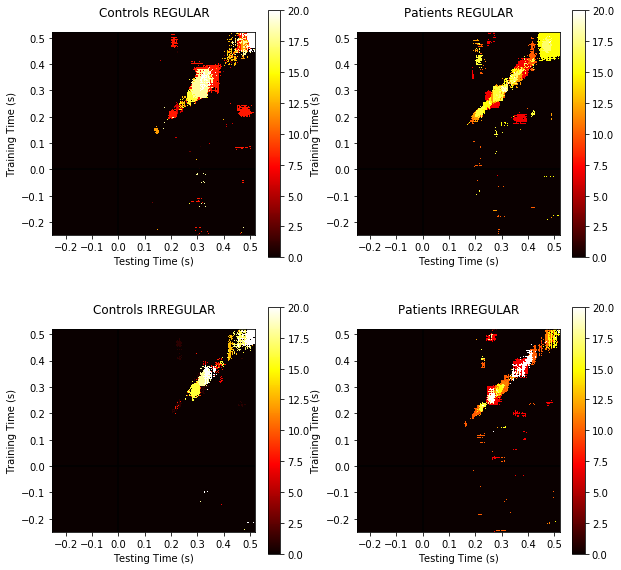

In [11]:
fig=plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
thresh = 0.72


mat_view(thresholding(formal_iso_controls,thr=thresh),ext = epochsextent,ax1=ax,fig=fig)
plt.title('Controls REGULAR')

ax=plt.subplot(2,2,2)
mat_view(thresholding(formal_iso_patients,thr=thresh),ext = epochsextent,ax1=ax,fig=fig)
plt.title('Patients REGULAR')

ax=plt.subplot(2,2,3)
mat_view(thresholding(formal_rnd_controls,thr=thresh),ext = epochsextent,ax1=ax,fig=fig)
plt.title('Controls IRREGULAR')

ax=plt.subplot(2,2,4)
mat_view(thresholding(formal_rnd_patients,thr=thresh),ext = epochsextent,ax1=ax,fig=fig)
plt.title('Patients IRREGULAR')

plt.show()


TODO 
- Unsupervised learning on the ROC_AUC images (across groups) 
- Kipf method applied to the ROC_AUC images (samples = number of points in an image) 

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding,Isomap,MDS,TSNE,SpectralEmbedding

n_neighbors = 8
n_components = 2

## Prepare vectors for unsupervised learning 

# Both ISO for the two groups : 
X_iso = np.concatenate([formal_iso_controls,formal_iso_patients]).reshape((40,386*386))

X_rnd = np.concatenate([formal_rnd_controls,formal_rnd_patients]).reshape((40,386*386))

y = 2*np.ones(40)
y[0:20]=1

#Y = Isomap(n_neighbors=n_neighbors,n_components=n_components).fit_transform(X)

#Y = LocallyLinearEmbedding(n_neighbors,n_components=n_components,method='ltsa',eigen_solver='auto').fit_transform(X)

#Y = MDS(n_components=n_components,metric=False).fit_transform((X))

#Y = SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components).fit_transform(X)

Y = LocallyLinearEmbedding(n_neighbors,n_components=n_components,method='ltsa',eigen_solver='dense').fit_transform(X_rnd)

plt.scatter(Y[:, 0], Y[:, 1],c=y,alpha=0.8,cmap=plt.cm.Set1)
plt.show()

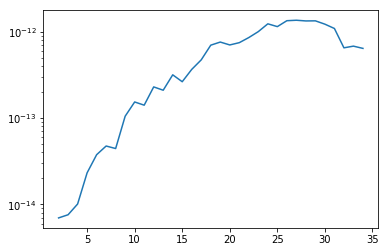

In [55]:
errors = []
ncompmax=35
for n_components in range(2,ncompmax):



    n_neighbors = n_components+1

    #Y = SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components,affinity='rbf').fit_transform(X)
    #lle = MDS(n_components=n_components)

    lle = LocallyLinearEmbedding(n_neighbors,n_components=n_components,method='ltsa',eigen_solver='dense')

    lle.fit(X_rnd)

    errors.append(lle.reconstruction_error_)

plt.semilogy(range(2,ncompmax),np.abs(errors))

for RND (plot above)

for iso

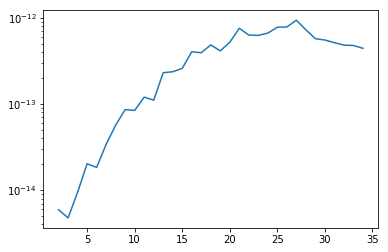

In [54]:
plt.semilogy(range(2,ncompmax),np.abs(errors))

In [29]:
formal_iso_controls.shape, formal_iso_patients.shape

((20, 386, 386), (20, 386, 386))

In [33]:

X_iso = np.concatenate([formal_iso_controls,formal_iso_patients]).reshape((40,386*386))

X_rnd = np.concatenate([formal_rnd_controls,formal_rnd_patients]).reshape((40,386*386))


In [46]:
y = 2*np.ones(40)
y[0:20]=1

In [47]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])